<a href="https://colab.research.google.com/github/rja868/classification-default-probability/blob/main/default_probability_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Modeling - Probability of Default
Richard Albanese

In [1]:
! pip install scikit-learn==1.2.2

In [16]:
#Import necessary libaries
import pandas as pd   #pandas import
from sklearn.model_selection import train_test_split   #import train_test_split function from sklearn
from sklearn.ensemble import RandomForestClassifier   #import RandomForestClassifier from sklearn
from xgboost import XGBClassifier   #import XGBClassifier from xgboost
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix   #import accuracy_score, classification_report, confusion_matrix from sklearn
import os   #imports built-in Python os module (enables file/directory manipulation and other interactions with the operating system)

#Load the dataset
url = 'https://github.com/Safa1615/Dataset--loan/blob/main/bank-loan.csv?raw=true'  #sets the URL of the dataset we're using
data = pd.read_csv(url, nrows=700)  #reads the csv file into the dataset

# Save to Excel
data.to_excel('dataset.xlsx', index=False)  #saves the dataset to an Excel file
current_directory = os.getcwd()  #gets the current working directory where the python script is located
file_path = os.path.join(current_directory, 'dataset.xlsx')  #creates a path to the Excel file, useful for handling files/directories across different platforms
print(f"The file is saved at: {file_path}")  #prints the path to the Excel file

#Split the data into features (independent variables) and the target variable (default or not)
X = data.drop('default', axis=1)  #creates a new dataframe X and removes the column named 'default'
y = data['default']  #creates a new dataframe y using the column named 'default' from 'data' dataframe

#Split the dataset into training and testing sets
#X contains independent variables, y is the target variable, this function randomly splits the data in training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize Random Forest classifier
classifier_RF = RandomForestClassifier(n_estimators=100, random_state=42)

#Train the classifier on the training data
classifier_RF.fit(X_train, y_train)

#Make prediction on the test data
y_pred = classifier_RF.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#Print the results
print(f"Accuracy: {accuracy: .2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

The file is saved at: /content/dataset.xlsx
Accuracy:  0.78
Confusion Matrix:
[[94  8]
 [23 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       102
           1       0.65      0.39      0.49        38

    accuracy                           0.78       140
   macro avg       0.73      0.66      0.68       140
weighted avg       0.76      0.78      0.76       140



In [3]:
#Initialize XGBoost Classifier
classifier_XG = XGBClassifier(n_estimators=100, random_state=42)  # Creates an instance of XGBClassifier with 100 trees and random state of 42

#Train the classifier on the training data
classifier_XG.fit(X_train, y_train)  #'X_train' contains input data for training, 'y_train' contains the true class labels of the training data

#Make prediction on the test data
y_pred = classifier_XG.predict(X_test)  #y_pred contains predicted values from 'X test" data using the trained model 'classifier_XG'

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred) #accuracy is the number of correctly predicted instances divided by the total number of instances
confusion = confusion_matrix(y_test, y_pred)  #helps identify where the model is performing well and where it may be making errors
classification_rep = classification_report(y_test, y_pred)  #generates a report with the main classification metrics

#Print the results
print(f"Accuracy: {accuracy: .2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep) #precision is true positives divided by the sum of true pos and false pos, recall is the ratio of true positives to the total actual positives,
#f1-score is useful when you need a balance between precision and recall, #support is number of actual occurences in each class

Accuracy:  0.77
Confusion Matrix:
[[93  9]
 [23 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       102
           1       0.62      0.39      0.48        38

    accuracy                           0.77       140
   macro avg       0.71      0.65      0.67       140
weighted avg       0.75      0.77      0.75       140



**Data Exploration and Visualization**

Below, head() and info() are used to understand the data.

In [4]:
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 49.3 KB


The following is a simple bar chart showing the number of cases resulting in a no default versus the number resulting in default.  The data has many more cases resulting in no default compared to default.**bold text**

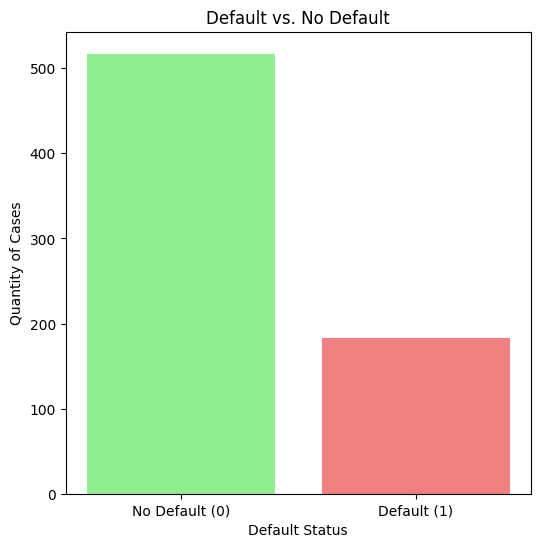

In [6]:
import matplotlib.pyplot as plt

# Count the occurrences of 'default' values (0 and 1)
default_counts = data['default'].value_counts()
plt.figure(figsize=(6, 6))
plt.bar(default_counts.index, default_counts.values, color=['lightgreen', 'lightcoral'])
plt.xlabel("Default Status")
plt.ylabel("Quantity of Cases")
plt.title("Default vs. No Default")
plt.xticks(default_counts.index, ['No Default (0)', 'Default (1)'])
plt.show()

The following histogram shows distribution of debt to income (debtinc column) in 9 bins.  There a many more cases with debtinc ratios below 20 than above 20.

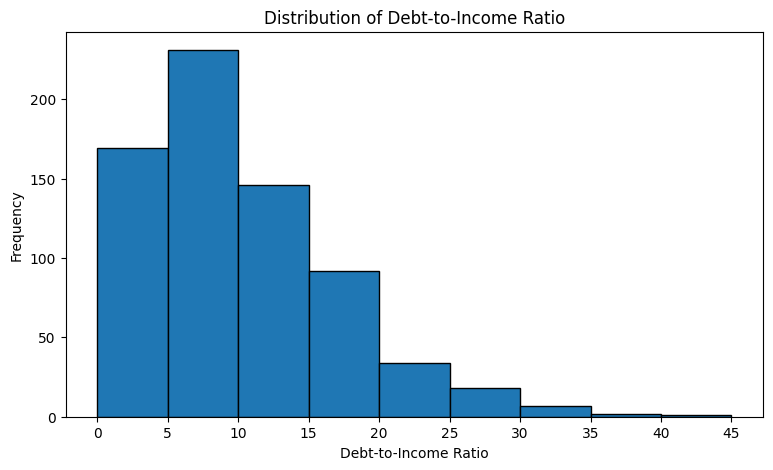

In [7]:
custom_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]  # Custom bins for the histogram
plt.figure(figsize=(9, 5))
plt.hist(data['debtinc'], bins=custom_bins, edgecolor='black')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Debt-to-Income Ratio')
plt.xticks(custom_bins)
plt.show()

**Data Exploration**

The following code explores relationships within the data.  Based on the age feature alone, younger people appear to have a greater likelihood of default.  Higher 'debtinc' appear to significantly increase the likelihood of default.  The 'debtinc' feature might heavily influence credit risk prediction and play an important part in the model.

In [8]:
average_age_no_default = data[data['default'] == 0]['age'].mean()
average_age_default = data[data['default'] == 1]['age'].mean()

print(f"Average age for no default (0): {average_age_no_default}")
print(f"Average age for default (1): {average_age_default}")

Average age for no default (0): 35.51450676982592
Average age for default (1): 33.01092896174863


In [9]:
average_debtinc_no_default = data[data['default'] == 0]['debtinc'].mean()
average_debtinc_default = data[data['default'] == 1]['debtinc'].mean()

print(f"Average debtinc for no default (0): {average_debtinc_no_default}")
print(f"Average debtinc for default (1): {average_debtinc_default}")


Average debtinc for no default (0): 8.679303675048358
Average debtinc for default (1): 14.727868852459016


**Missing Values**

The following code checks for missing values in the data.  There are none.

In [10]:
missing_values = data.isnull().sum()
print(missing_values)
print("Total missing values:", missing_values.sum())


age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64
Total missing values: 0


**Data Scaling**

The only categorical variable in the data is default (0 or 1).  It is already encoded.

However, it could be beneficial to scale our numerical feature data.  The code below creates X_train_scaled which is the scaled version of the training data used above.  X_test_scaled is the scaled version of the testing data used above.  Using fit_transform on the training data avoids data leakage because the stats are computed only using the training data.  For the testing data, transform uses the same stats from the training data rather than recomputing the stats using the test data.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Initialize StandardScaler
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Transform the testing data (using the same scaler fitted on training data)

# Convert the NumPy array back to a DataFrame with the same columns as the original X_train (so we can use methods like head() to see the transformed data)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


In [18]:
X_train_scaled.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
82,0.264833,-0.786106,-0.198909,-0.782859,-0.365569,1.359338,0.586868,0.164042
51,1.374358,-0.786106,-1.115692,0.510359,-0.688341,0.539773,-0.358670,-0.321878
220,-0.844692,-0.786106,0.412279,-0.351786,-0.580750,-1.157897,-0.710318,-0.788689
669,0.141553,1.325257,0.259482,-0.639168,-0.069694,0.393423,-0.282396,0.487168
545,1.004517,0.269576,0.259482,2.234650,-0.231080,-0.265156,-0.425299,-0.175258


Below, the scaled features are used with XGBoost to assess performance versus the non-scaled data above, but the f1-score is lower than with the non-scaled data.  We'll use the non-scaled training and test data above for hyperparameter tuning.

In [19]:
classifier_XG.fit(X_train_scaled, y_train)

#Make prediction on the test data
y_pred_using_scaled_data = classifier_XG.predict(X_test_scaled)

#Evaluate the model
accuracy_scaled = accuracy_score(y_test, y_pred_using_scaled_data)
confusion_scaled = confusion_matrix(y_test, y_pred_using_scaled_data)
classification_rep_scaled = classification_report(y_test, y_pred_using_scaled_data)

#Print the results
print(f"Accuracy: {accuracy_scaled: .2f}")
print("Confusion Matrix:")
print(confusion_scaled)
print("Classification Report:")
print(classification_rep_scaled) #precision is true positives divided the sum of true pos and false pos, recall is the ratio of true positives to the total actual positives,
#f1-score is useful when you need a balance between precision and recall, #support is number of actual occurences in each class

Accuracy:  0.77
Confusion Matrix:
[[93  9]
 [23 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       102
           1       0.62      0.39      0.48        38

    accuracy                           0.77       140
   macro avg       0.71      0.65      0.67       140
weighted avg       0.75      0.77      0.75       140



**Hyperparameter Tuning:**



In [14]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    # Number of trees used in the search
    'n_estimators': [50, 100, 150, 200],

    # Maximum depth of trees
    'max_depth': [3, 5, 7, 9],

    # Step size shrinkage (a lower learning rate means each tree has smaller impact on the overall model)
    'learning_rate': [0.01, 0.1, 0.2],

    # Fraction of samples used for fitting (0.6 means that for each tree, 60% of the data is randomly sampled and used for training while 20% is ignored for that particular tree's training)
    'subsample': [0.6, 0.8, 1.0],

    # Specifies the proportion of the total features that are randomly selected to build each tree. 0.8 mean 80% of the features are randomly selected to build each tree
    'colsample_bytree': [0.6, 0.8, 1.0]  # Fraction of features used per tree
}

# Initialize the XGBClassifier
classifier_XG = XGBClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=classifier_XG,
    param_grid=param_grid,
    scoring='accuracy',  # Use 'accuracy' as the evaluation metric; this can be adjusted based on our needs
    cv=5,  # Number of cross-validation folds
    verbose=1,  # Display the progress of the grid search
    n_jobs=-1  # Use all available cores for parallel processing
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred_using_best_model = best_model.predict(X_test)

# Evaluate the best model
accuracy_best_model = accuracy_score(y_test, y_pred_using_best_model)
confusion_best_model = confusion_matrix(y_test, y_pred_using_best_model)
classification_rep_best_model = classification_report(y_test, y_pred_using_best_model)

print(f"Accuracy of best model: {accuracy_best_model:.2f}")
print("Confusion Matrix of best model:")
print(confusion_best_model)
print("Classification Report of best model:")
print(classification_rep_best_model)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 50, 'subsample': 0.8}
Best accuracy score: 0.8035714285714286
Accuracy of best model: 0.79
Confusion Matrix of best model:
[[95  7]
 [23 15]]
Classification Report of best model:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       102
           1       0.68      0.39      0.50        38

    accuracy                           0.79       140
   macro avg       0.74      0.66      0.68       140
weighted avg       0.77      0.79      0.76       140



**Performance Improvements**

By applying grid search for hyperparameter tuning, we were able to achieve accuracy of 0.79 (versus 0.77 for the original XGBoost model).  All other performance metrics improved as well including the weighted avg f1-score which increased to 0.76 (versus 0.75 for the original XGBoost model).

If we compare the confusion matrix for the two models, we see improvement in the new hypertuned model across all four regions.

In the above grid search, we are using 'accuracy' as the evaluation metric but we could try different metrics, such as f1-score to further improve performance.

**Alternative Models and Interpretability**

Although model performance has improved, 79% accuracy in predicting defaults may be considered inadequate from a risk management perspective and therefore, other models should be trained and tested.  Using a logistic regression model or hypertuning the Random Forest Classifier might be considered.

In terms interpretability, XGBoost is less interpretable than models like logistic regression or decision trees, so this could be an issue if applied to our current use case.  Support Vector Machines and Neural Networks should be avoided because they are considered even less interpretable than XGBoost in most cases.

One key difference between the Random Forest model and the XGBoost model is how the decision trees are constructed.  Random Forest builds each decision tree independently by using random subsets of the training data and then aggregating the results.  XGBoost builds the trees sequentially, attempting to correct the errors of the previous tree.


**Model Performance Rankings**

If we rank all three models used in this exercise, the scores are very similar:

ACCURACY:
*  XPBoost with Tuned Hyperparameters:  0.79
*  Random Forest:  0.78
*  XPBoost (initial):  0.77

WEIGHTED AVG F1-SCORE:
*  XPBoost with Tuned Hyperparameters:  0.76
*  Random Forest:  0.76
*  XPBoost (initial):  0.75